In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*0.001]
a = [1]
b = [0.01]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

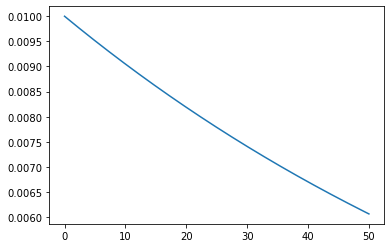

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 50, 0.01)

In [4]:
lambda_dist.rvs(10)

array([116.43399488, 219.21758612, 262.34733471, 122.95110943,
       154.15038065,  79.61695266,   3.71613215, 317.8032415 ,
         1.31507549,  44.71555836])

In [5]:
lmd = lambda_dist.rvs(1)
w_dist = gen_w_dist(lmd)

In [6]:
#data = []
#for i in range(1000):
#    x = (np.random.rand() - 0.5)*10
#    y = x**2 + np.random.randn() + 0.4
    
#    data.append([x,y])

data = data.x_00121 

In [7]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

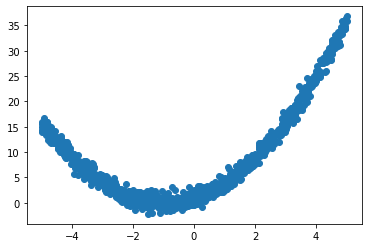

In [8]:
draw_data(data)

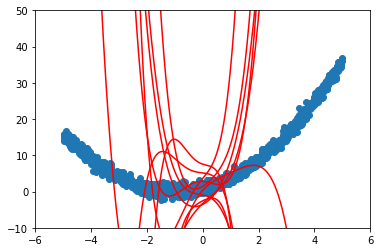

In [9]:
def draw_estimate(data, mus):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for mld in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.xlim(-6,6)
    plt.ylim(-10,50)
    plt.show()
   
draw_estimates(10, data)

In [10]:
def update(data):
    i = len(mu)
    ph_vecs = [phi(x[0]) for x in data]
    ph_sum = sum([np.dot(p, p.T) for p in ph_vecs])
    
    gauss_lambda.append(gauss_lambda[0] + ph_sum)
    y_ph = [data[j][1]*ph_vecs[j] for j in range(len(ph_vecs))]    
    mu.append(
        np.dot(
            np.linalg.inv(gauss_lambda[i]),
            sum(y_ph) + np.dot(gauss_lambda[0], mu[0])
        )
    )
    
    a.append(a[0] + len(data)/2)
    b.append(b[0] + 0.5*(
        np.squeeze(
            np.dot( np.dot(mu[0].T, gauss_lambda[0]) , mu[0] ) 
            - np.dot( np.dot(mu[i].T, gauss_lambda[i]) , mu[i] )
            + sum([d[1]*d[1] for d in data])
        )
    ))
    

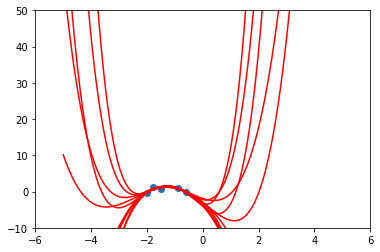

In [11]:
update(data[:5])
draw_estimates(10, data[:5])

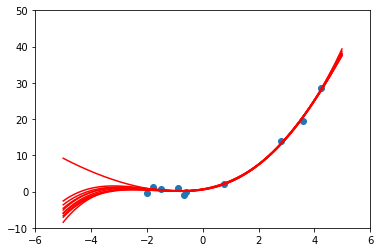

In [12]:
update(data[:10])
draw_estimates(10, data[:10])

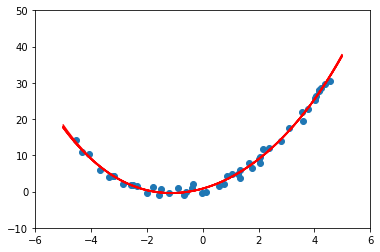

In [13]:
update(data[:50])
draw_estimates(10, data[:50])

In [14]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[-2.49630444],
        [-4.39074581],
        [-0.27253432],
        [ 0.61879644],
        [-0.02436982]]),
 array([[ 0.54939813],
        [ 1.13716012],
        [ 0.9006526 ],
        [ 0.13632055],
        [-0.01207948]]),
 array([[ 0.81848023],
        [ 2.16976277],
        [ 0.93728551],
        [-0.00755095],
        [ 0.00539819]])]

In [15]:
a

[1, 3.5, 6.0, 26.0]

In [16]:
b

[0.01, 0.3899979829397453, 3.0021922902695994, 19.684993599910523]

In [17]:
1/np.sqrt(lmd)

array([0.16772838])

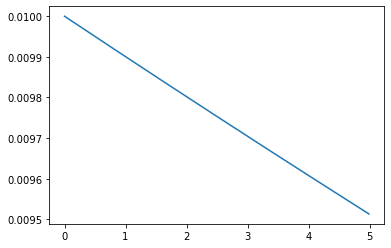

In [18]:
draw(lambda_dist, 0, 5, 0.01)

In [19]:
data = []
for i in range(1000):
    x = (np.random.rand() - 0.5)*10
    y = x**2 + 2*x + 1.0 + np.random.randn()
    
    data.append([x,y])
    
data

[[1.3852182707710414, 6.250810978369129],
 [-1.7635867508823944, 0.8767397172894078],
 [2.889177920511683, 16.2575753307584],
 [-3.0026349538643835, 3.5170810105258483],
 [-1.3873267661848565, 1.4976138458821908],
 [2.036733563547882, 10.730391941454947],
 [-1.690597370535365, 0.18685869747462636],
 [4.544000733094872, 31.949179702161047],
 [2.9238479497169445, 15.967380351221694],
 [0.6322984557456768, 2.899404242299584],
 [-4.53433571826576, 10.867563075602355],
 [3.31793609476302, 19.16021679987345],
 [4.180664049477299, 26.402828013913673],
 [4.818129209330072, 34.4515338194986],
 [4.132410919517654, 25.171896101332944],
 [-0.7154279567302146, -0.2281484007646064],
 [-3.7931944854453956, 6.750447339759624],
 [-3.3895846583886744, 6.4914742844746645],
 [4.081665650368941, 26.87735717195551],
 [-1.343315925063453, 0.3471897450417566],
 [4.3679773636966015, 29.163224889185987],
 [3.488135036771529, 21.514676795180282],
 [-1.8528391361329288, 0.7627406705970805],
 [3.666425571594798, 1